Initialise the notebook:

In [2]:
%matplotlib inline

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table

mpl.rcParams['savefig.dpi'] = 80
mpl.rcParams['figure.dpi'] = 80
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

os.chdir('/Users/amsys/paper_cloudy')

We've done two runs in the Ha range: one with a radius 10x our NGC5548 model.
Comparing the spectra for them:

/Users/amsys/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


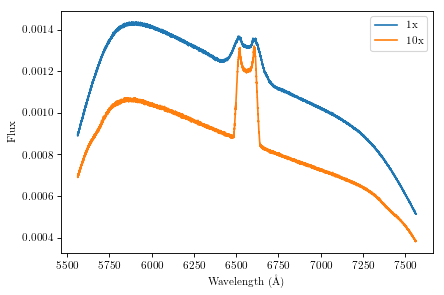

In [3]:
r10 = 'l100_rad10'
r01 = 'l100_rad01'

def plot_spec(col, spectra, names, logX=False, logY=False, scale_to=None, limX=False):
    fig, ax = plt.subplots()
    ax.set_xlabel(r"Wavelength (\AA)")
    
    if scale_to:
        ax.set_ylabel(r"$F_{\lambda}/F_{"+str(scale_to)+r"\AA}$")
    else:
        ax.set_ylabel(r"Flux")
        scale_factor = 1
    
    maxY = -1
    minY = 99999999
    
    for spectrum, name in zip(spectra, names):
        if scale_to: 
            # Annoyingly, the file is sorted by frequency not wavelength 
            # so we need to flip it to get searchsorted to run
            index_scale = np.searchsorted(spectrum['Lambda'][::-1], scale_to)
            scale_factor = spectrum[col][::-1][index_scale]
        
        if limX:
            minY_curr = np.amin(spectrum[col][(spectrum['Lambda']>limX[0]) & (spectrum['Lambda']<limX[1])])/scale_factor
            if minY_curr < minY:
                minY = minY_curr
            maxY_curr = np.amax(spectrum[col][(spectrum['Lambda']>limX[0]) & (spectrum['Lambda']<limX[1])])/scale_factor
            if maxY_curr > maxY:
                maxY = maxY_curr
        
        if logX and logY:
            ax.loglog(spectrum['Lambda'], spectrum[col]/scale_factor, label=name)
        elif logY:
            ax.semilogy(spectrum['Lambda'], spectrum[col]/scale_factor, label=name)
        elif logX:
            ax.semilogx(spectrum['Lambda'], spectrum[col]/scale_factor, label=name)
        else:
            ax.plot(spectrum['Lambda'], spectrum[col]/scale_factor, label=name)
            
    if limX:
        ax.set_xlim(limX[0], limX[1])
        ax.set_ylim(minY, maxY)
            
    ax.legend()
    fig.show()
    
spec_r01 = Table.read(r01+'.spec', format='ascii')
spec_r10 = Table.read(r10+'.spec', format='ascii')

plot_spec('A40P0.50', [spec_r01, spec_r10], ['1x', '10x'])

We get a **much** stronger line in the 10x radius model, with a vastly improved line-continuum ratio. The dips at the edge of the spectrum are a feature of our binning in the model; we have no photons generated beyond the <5500/>7500 bounds, so none can be up/down scattered from there into our spectrum.

Plotting the distribution of C-IV and H-I species throughout the wind:

/Users/amsys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/amsys/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


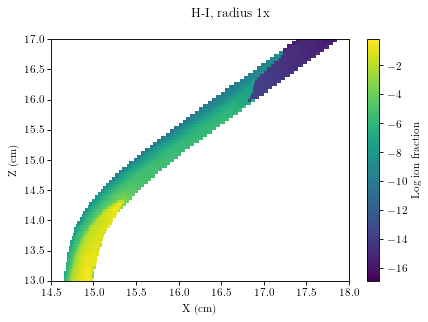

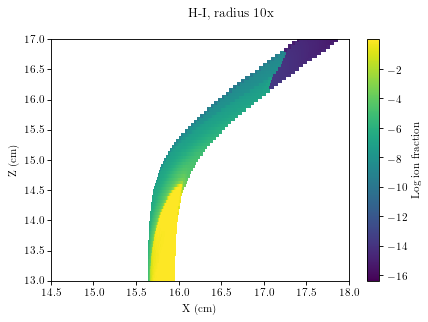

In [186]:
import matplotlib.colors as colors

def load_grid(prefix):
    return [np.loadtxt(prefix+'.grid_x.txt'),
            np.loadtxt(prefix+'.grid_z.txt')]

x_r01, z_r01 = load_grid(r01+'.dom0')
x_r10, z_r10 = load_grid(r10+'.dom')

table_h1_r01 = Table.read(r01+'.ionH1.dat', format='ascii')
table_h1_r10 = Table.read(r10+'.ionH1.dat', format='ascii')

def plot_dat(table, x, z, title):
    fig, ax = plt.subplots() 
    fig.suptitle(title)
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Z (cm)')
    
    size = (len(x)-1, len(z)-1)
    data = np.reshape(table['var'], size).T
    
    im = ax.pcolormesh(np.log10(x), np.log10(z), np.ma.log10(data))
    ax.set_xlim(14.5, 18)
    ax.set_ylim(13, 17)
    cbar = fig.colorbar(im, ax=ax).set_label('Log ion fraction')
    fig.show()
    
    
plot_dat(table_h1_r01, x_r01, z_r01, 'H-I, radius 1x')
plot_dat(table_h1_r10, x_r10, z_r10, 'H-I, radius 10x')

Neatly, we don't seem to see any change in the extended wind behaviour- everything at or greater than ~1e14.5cm height is more or less equivalent. The transition zone from wind base to extended wind is roughly consistent. We also see a much greater ion fraction of H-1 in the base.

/Users/amsys/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10
/Users/amsys/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


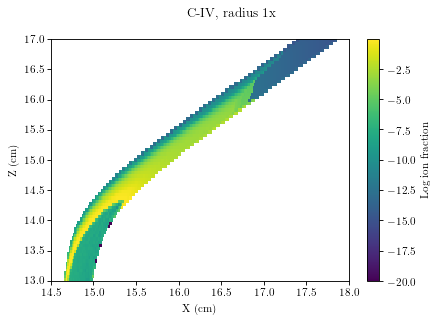

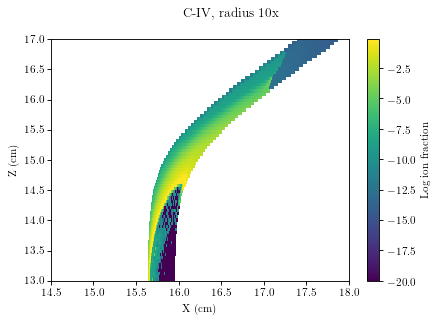

In [187]:
table_c4_r01 = Table.read(r01+'.ionC4.dat', format='ascii')
table_c4_r10 = Table.read(r10+'.ionC4.dat', format='ascii')

plot_dat(table_c4_r01, x_r01, z_r01, 'C-IV, radius 1x')
plot_dat(table_c4_r10, x_r10, z_r10, 'C-IV, radius 10x')

For C-IV, the situation is more or less the same in terms of ion distribution. Emission still occurs at roughly the same height above the disk, just at a later radius, the extended wind region is still roughly similar and peters out at the same radius. There's less C-IV in the base but the front seems sharper to compensate.

Next steps are:
* Do another run with a full spectrum to see if the line-continuum improvements are just a Ha thing and the rest of the spectrum is wrecked, or if it's an all-round good thing
* Bin the Hb photons and verify that we're expecting an OOM increase in path
* Do all this sort of analysis in Jupyter Notebooks stored on GitHub in future so I don't have to root around three different machines for the python & gnuplot scripts used to make figures

We want to compare the full spectra:
    

/Users/amsys/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


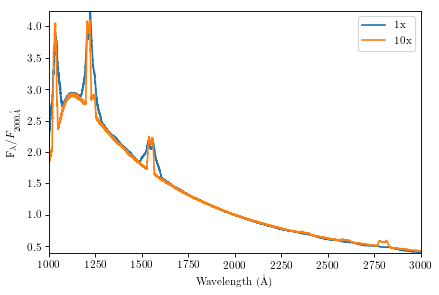

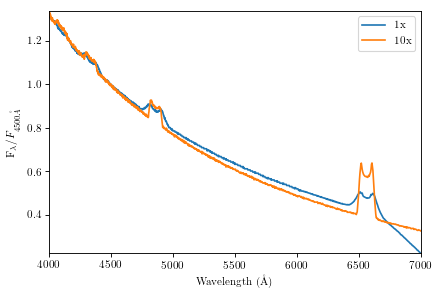

In [191]:
spec_r01_full = Table.read(r01+'_s-full.spec', format='ascii')
spec_r10_full = Table.read(r10+'_s-full.spec', format='ascii')
plot_spec('A40P0.50', [spec_r01_full, spec_r10_full], ['1x', '10x'], limX=(1000, 3000), scale_to=2000)
plot_spec('A40P0.50', [spec_r01_full, spec_r10_full], ['1x', '10x'], limX=(4000, 7000), scale_to=4500)

Looks fairly promising. The lower-wavelength lines aren't quite as boosted by the change as Ha is, but we get an improvement in Hb too. The lines are unsurprisingly narrowed, C-IV being most dramatically so. We want the actual delay too:

In [15]:
import os
import sys
sys.path.append('/Users/amsys/bindata')
import tfpy

print('Running...')
db = tfpy.open_database(r10)
print('Opened DB')
tf = tfpy.TransferFunction(db, r10+'_plot', continuum=1.043e44, wave_bins=100, delay_bins=100)
print('Created TF')
tf.line(28, 6562.8).delay_dynamic_range(2).run(scaling_factor=1/20).plot(velocity=True)
print('Plotted TF')
print("Delay: {} days".format(tf.delay(threshold=0.8) * 1.15741e-5))
print("Delay: {} seconds".format(tf.delay(threshold=0.8))

Running...
Opening database 'l100_rad10'...
Found existing filled photon database 'l100_rad10'
Opened DB
Created TF
'l100_rad10_plot' successfully run (241.1s)
Plotting to file 'l100_rad10_plot.eps'...
Total line: 5.890e-04
Successfully plotted (1.7s)
Plotted TF
Delay: 2.26701484711303 days


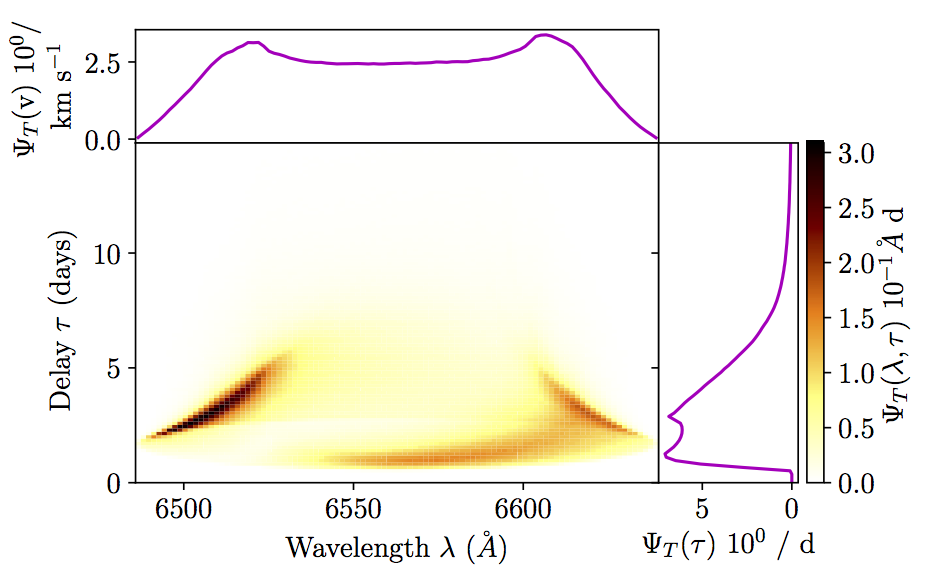

In [16]:
PATH = "/Users/amsys/paper_cloudy/l100_rad10.png"
Image(filename = PATH, width=800, height=800)

The Hb delay is now , muuuuch closer to the literature value. There's currently a run on to get the  C-IV photons, for binning and comparison to the data. Adding the point to our existing plot gives:

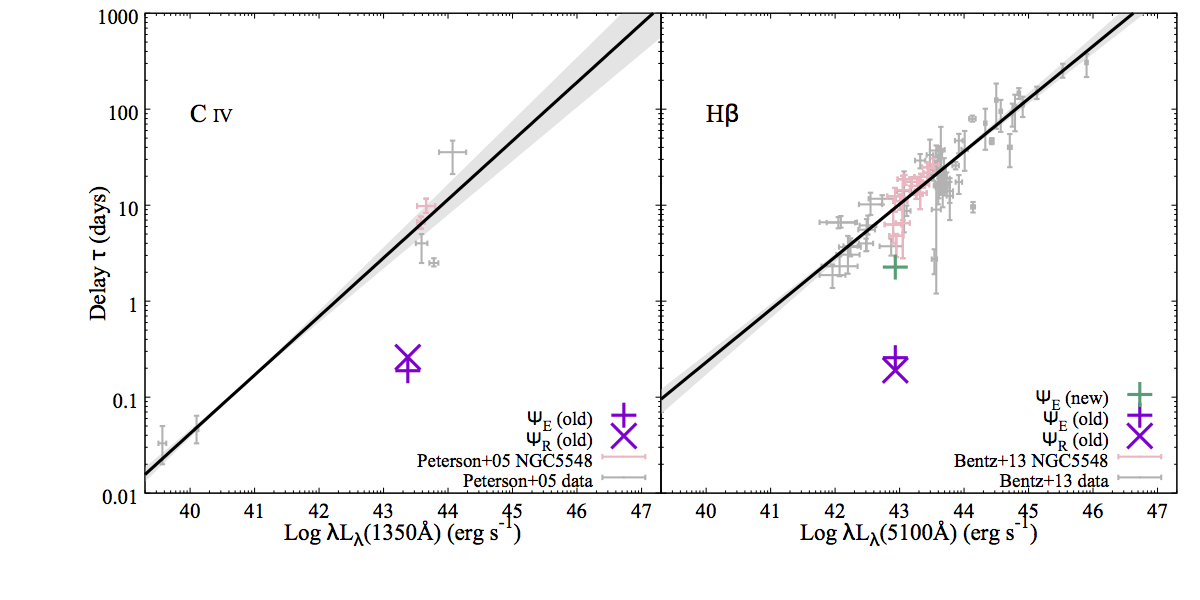

In [17]:
PATH = "/Users/amsys/paper_cloudy/lum_t.png"
Image(filename = PATH, width=800, height=800)

This still looks like we're on the very low end of the range, but it's a dramatic improvement!